# Tree and SVM Models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")

The table data has been split into a training set, and a test set. The response variable is "y".

In [2]:
data = pd.read_excel("./data/dataPoly.xlsx", sheet_name='data')
data_train = pd.read_excel("./data/dataPoly.xlsx", sheet_name='dataTrain')
data_test = pd.read_excel("./data/dataPoly.xlsx", sheet_name='dataTest')
data.head()

,x,y
0,0.0108,4.9405
1,0.0693,4.7366
2,0.0201,4.9260
3,0.1152,4.6578
4,0.1370,4.5140


## Decision tree regressor

We can fit a nonparametric model using a decision tree [DecisionTreeRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn-tree-decisiontreeregressor). We can use the [mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn-metrics-mean-squared-error) function to evaluate the model on test data.

In [3]:
regressor = DecisionTreeRegressor()
regressor.fit(data_train.x.to_frame(), data_train.y)

y_pred = regressor.predict(data_test.x.to_frame())
print("R^2 =", regressor.score(data_test.x.to_frame(), data_test.y))
print("MSE =", mean_squared_error(data_test.y, y_pred))

R^2 = 0.16048233249536414
MSE = 46.9010809115


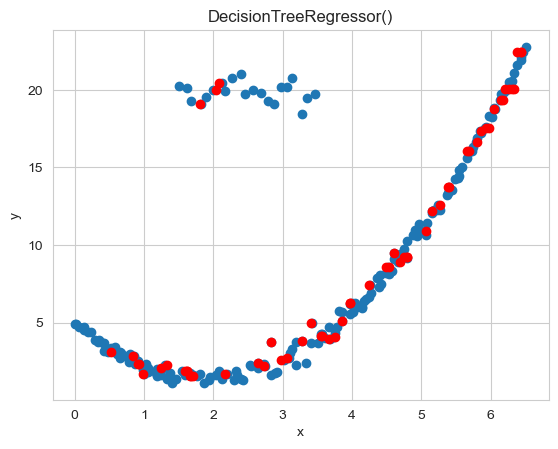

In [4]:
plt.figure()
plt.scatter(data.x, data.y)
plt.scatter(data_test.x, y_pred, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("DecisionTreeRegressor()")
plt.show()

## Epsilon-Support Vector Regression

We can use the class [SVR()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn-svm-svr) to fit an SVM model.

In [5]:
regressor = SVR()
regressor.fit(data_train.x.to_frame(), data_train.y)

y_pred = regressor.predict(data_test.x.to_frame())
print("R^2 =", regressor.score(data_test.x.to_frame(), data_test.y))
print("MSE =", mean_squared_error(data_test.y, y_pred))

R^2 = 0.4086296808196027
MSE = 33.037907672605634


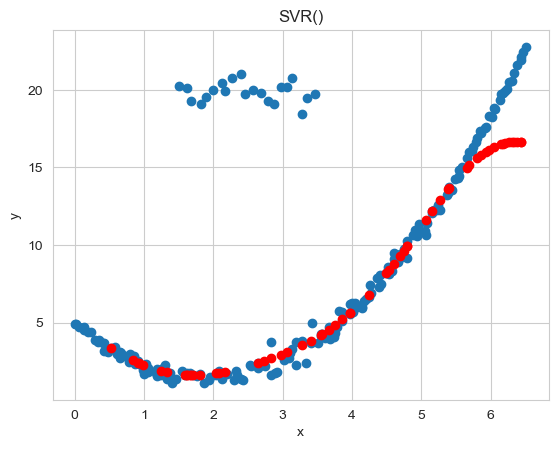

In [6]:
plt.figure()
plt.scatter(data.x, data.y)
plt.scatter(data_test.x, y_pred, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("SVR()")
plt.show()

The SVR class has the property "kernel" whose default value is "rbf". We can change it to "poly".

In [7]:
regressor = SVR(kernel='poly')
regressor.fit(data_train.x.to_frame(), data_train.y)

y_pred = regressor.predict(data_test.x.to_frame())
print("R^2 =", regressor.score(data_test.x.to_frame(), data_test.y))
print("MSE =", mean_squared_error(data_test.y, y_pred))

R^2 = 0.49692586061273825
MSE = 28.105091565276563


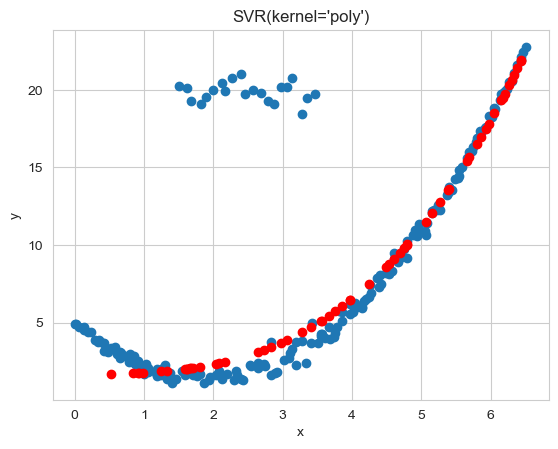

In [8]:
plt.figure()
plt.scatter(data.x, data.y)
plt.scatter(data_test.x, y_pred, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("SVR(kernel='poly')")
plt.show()

## Multi-layer Perceptron regressor

We can use the class [MLPRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn-neural-network-mlpregressor) to fit a neural network for regression. If our data is not normalized, we should normalize it first.

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(data_train.x.to_frame())
X_test_scaled = scaler.transform(data_test.x.to_frame())

In [10]:
regressor = MLPRegressor(max_iter=10000)
regressor.fit(X_train_scaled, data_train.y)

y_pred = regressor.predict(X_test_scaled)
print("R^2 =", regressor.score(X_test_scaled, data_test.y))
print("MSE =", mean_squared_error(data_test.y, y_pred))

R^2 = 0.6110435013726692
MSE = 21.72971566804274


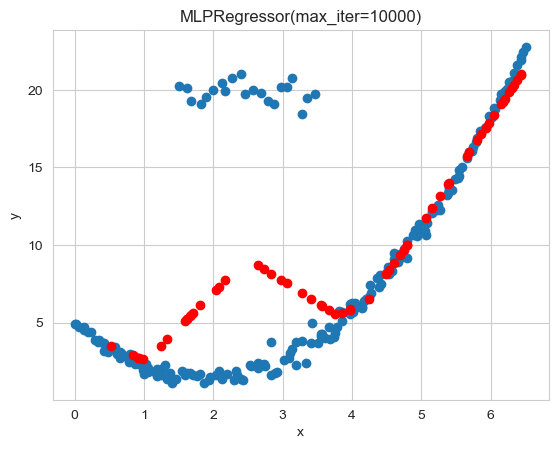

In [11]:
plt.figure()
plt.scatter(data.x, data.y)
plt.scatter(data_test.x, y_pred, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("MLPRegressor(max_iter=10000)")
plt.show()